**Notes**:
* Feel free to add cells as you need them.
* Keep your code clean and readable.
* Comments included in this document are just to summarize the question. For full details make sure you read the assignment pdf thoroughly.
* Don't forget to rename the file when you finish

# EECS 461/ECE 523  | Assignment 2

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

## DATA PREPARATION & VISUALIZATION 

In [4]:
class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [6]:
#train = pd.read_csv("fashionmnist/fashion-mnist_train.csv")
#test = pd.read_csv("fashionmnist/fashion-mnist_test.csv")

In [7]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

### a)  Split your data into X and y:

In [9]:
train = pd.DataFrame(pd.read_csv("train.csv"))

train = train.sample(frac=0.1, replace=None, random_state=None)



test = pd.DataFrame(pd.read_csv("test.csv"))

test = test.sample(frac=0.1, replace=False, random_state=None)


train_x_a = train.iloc[:,2:] 
train_y = train.iloc[:,1]

test_x = test.iloc[:,2:]
test_y = test.iloc[:,1]

In [10]:
# I am producing 3 instances for each class for the 
instances_for_each = {} # keeping them in a dictionary with class label as key and a list, which is composed of items, as value 
index=0
for i in range(10):
    instances_for_each[i] = []
    
for i in train.iloc[:,1]:
    if len(instances_for_each.values()) != 30: # doing this check till we have 3 for each.
        if len(instances_for_each[i]) == 3:
            pass
        else:
            instances_for_each[i].append(index)
        index += 1
    else:
        break
instances_for_each = [index for listt in instances_for_each.values() for index in listt ]


    

### b)  Visualizing the data:

In [30]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def plot_image(row): # I've seen this code in the book and used it
    image = row.values.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
    interpolation='gaussian') # I used gaussian to have smoother visualisition
    plt.axis("off")
    plt.show()

### c) Class visualization:

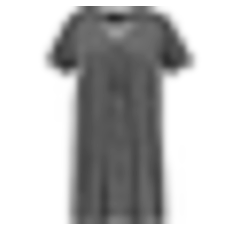

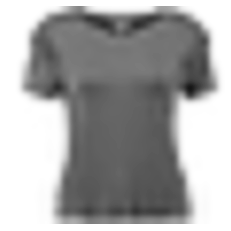

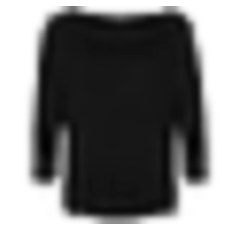

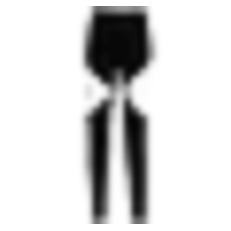

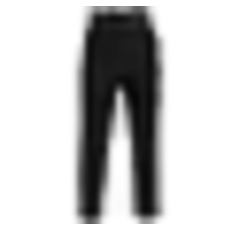

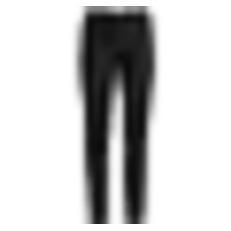

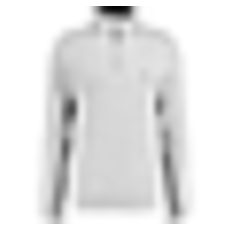

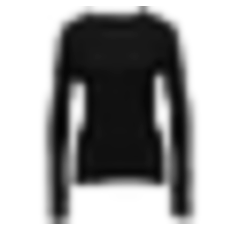

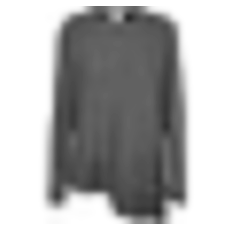

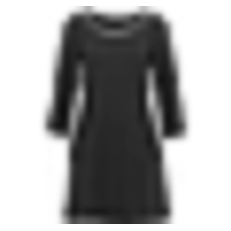

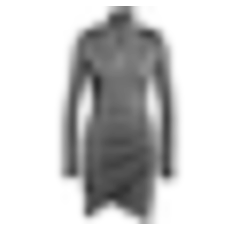

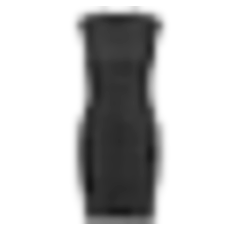

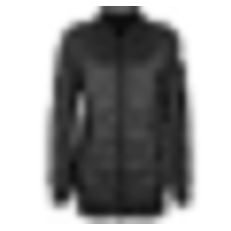

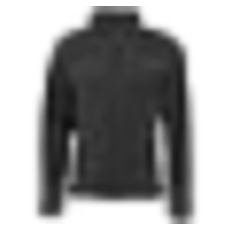

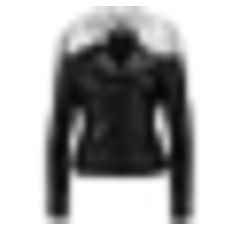

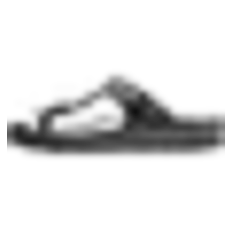

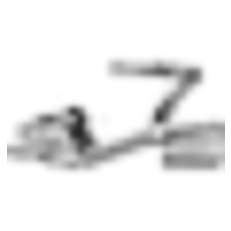

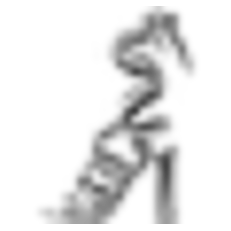

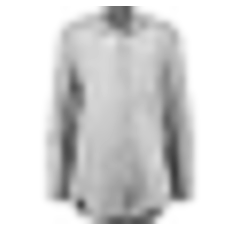

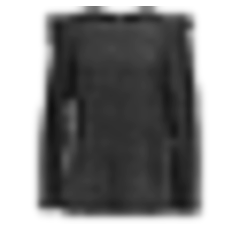

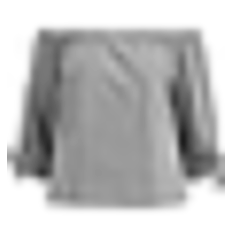

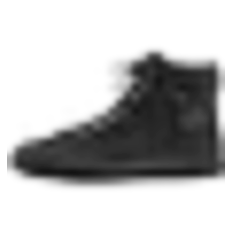

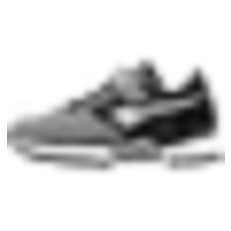

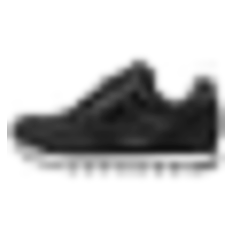

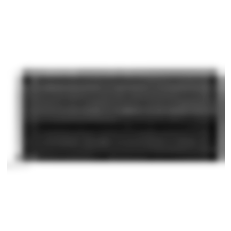

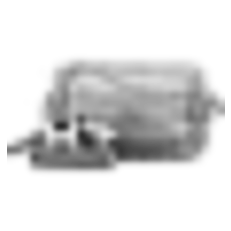

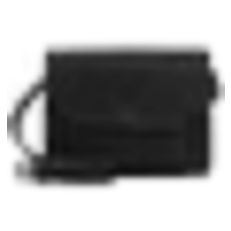

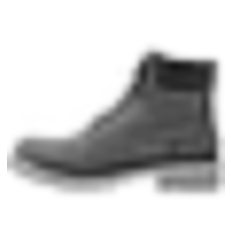

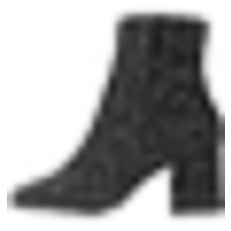

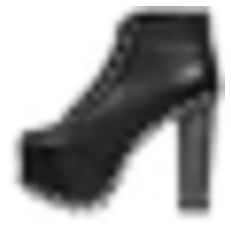

In [31]:
for i in instances_for_each:
    plot_image(train_x_a.iloc[i,:])


### d) Average visualization:

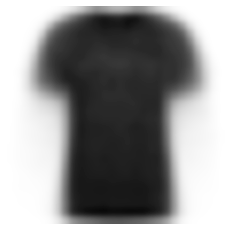

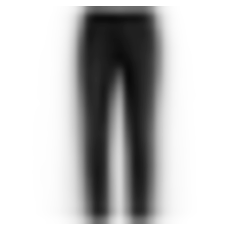

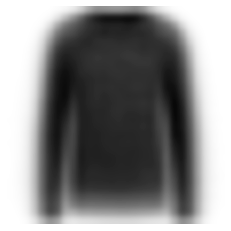

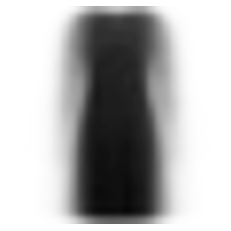

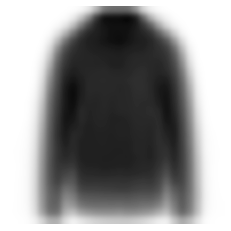

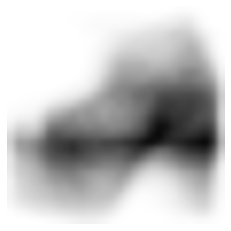

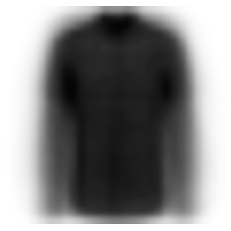

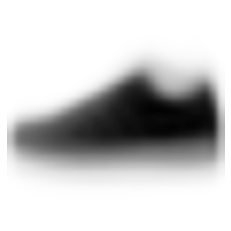

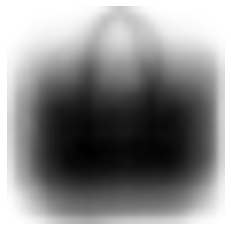

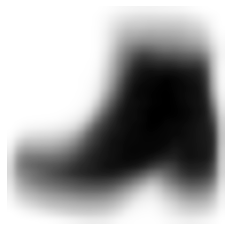

In [32]:
for i in range(10):
    average = train.loc[train['label'] == i].mean(axis = 0)[2:] # for each class having their mean
    plot_image(average)

## BINARY CLASSIFICATION

### e) Binary transformation:

In [33]:
train_y_e = train_y.replace([0,1,2,3,4,6],1) # first i am replacing 1 'cause if i replace 0 first then real 0s are going to be
train_y_e = train_y_e.replace([5,7,8,9], 0)  # mixed with replaced 0s


In [34]:
test_y_e = test_y.replace([0,1,2,3,4,6],1) # doing the same thing as we did in train
test_y_e = test_y_e.replace([5,7,8,9], 0)  

### f) Binary Classification Model

In [35]:
from sklearn.model_selection import cross_val_score # importing cross_val_score
log_reg = LogisticRegression() # creating model
accuracyScore = cross_val_score(log_reg,train_x_a,train_y_e,cv=5,scoring="accuracy") #checking the aScore with 5 fold
print (accuracyScore)
print (accuracyScore.mean())
    

[0.9733777  0.98333333 0.98666667 0.98333333 0.97662771]
0.9806677500030092


### g) Predict test data:

In [36]:
# train the model
log_reg_fit = log_reg.fit(train_x_a,train_y_e) # training model
log_reg_pred = log_reg.predict(test_x) # testing model


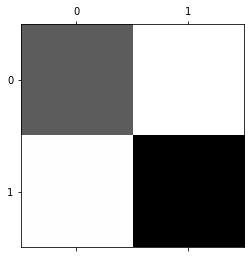

Con_Mat: [[193   2]
 [  4 301]]
0.988 0.9933993399339934 0.9868852459016394 0.9901315789473685


In [37]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix # importing confussion matrix
cm=confusion_matrix(test_y_e, log_reg_pred) # calculating confusion matrix

plt.matshow(cm, cmap='binary') # ploting confussion matrix
plt.show()
print('Con_Mat:', cm)

# print(accuracy, precision, recall, f1_score)

from sklearn.metrics import precision_score, recall_score # importing all recall and precision scores and f1 score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

precision = precision_score(test_y_e, log_reg_pred)
recall = recall_score(test_y_e, log_reg_pred)        # calculating all of these scores and accuracy
f1 = f1_score(test_y_e, log_reg_pred)
accuracy = accuracy_score(test_y_e, log_reg_pred)

print (accuracy,precision,recall,f1)


### h) Model evaluation:


Precision-Recal Curve:


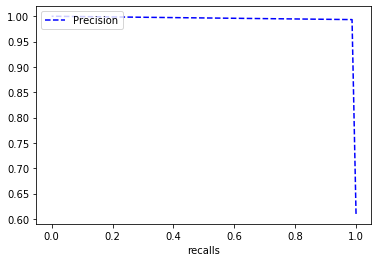

ROC Curve:


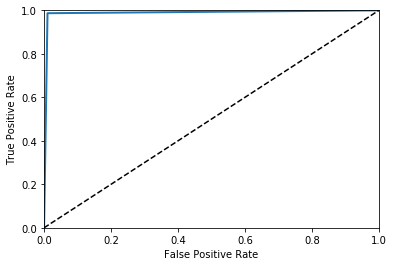

AUC Score: 0.9883144178226146


In [38]:
# plot precision-recall curve
from sklearn.metrics import precision_recall_curve # importing precision recall curve

precisions, recalls, thresholds = precision_recall_curve(test_y_e, log_reg_pred) # I've seen this code from book


plt.plot(recalls, precisions, "b--", label="Precision")
plt.xlabel("recalls")
plt.legend(loc="upper left")                              # Plotting the curve
print ("Precision-Recal Curve:")   
plt.show()


# plot ROC curve
from sklearn.metrics import roc_curve # importing roc curve

fpr, tpr, thresholds = roc_curve(test_y_e, log_reg_pred)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])                              # Ploting the ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print ("ROC Curve:")
plt.show()


# print AUC score
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(test_y_e, log_reg_pred)
print ('AUC Score:', auc_score)

### i) Learning curves:      NOT SURE ABOUT THIS PART

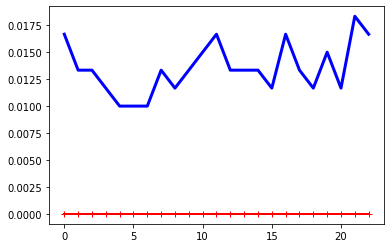

In [39]:
# plot learning curve page 164

from sklearn.model_selection import train_test_split
import numpy as np

def plot_learning_curves(model, X, y): # I've seen this code from the book and implement it my assignment however the result is 
                                            # weird and did not satisfy me :)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(100, len(X_train),100):
        
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predict = model.predict(X_train[:m])
        
        y_val_predict = model.predict(X_val)
        
        train_errors.append(1-accuracy_score(y_train_predict, y_train[:m]))
        
        val_errors.append(1-accuracy_score(y_val_predict, y_val))
    
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    
    plt.plot(val_errors, "b-", linewidth=3, label="val")

log_reg = LogisticRegression()

plot_learning_curves(log_reg,train_x_a,train_y_e)


# Hence, I am not sure if my result is correct but when we consider the accuracy score our model got,
    # this result is not suprising :)

## MULTICLASS CLASSIFICATION USING LOGISTIC REGRESSION

### j) Training and cross validating logistic regression:

In [40]:
# 3 fold Cross Validation on train_x_a and train_y

Mlog_reg = LogisticRegression() # creating model
accuracyScore = cross_val_score(Mlog_reg,train_x_a,train_y,cv=3,scoring="accuracy") # cross_val with 3 fold
print (accuracyScore)
print (accuracyScore.mean())

[0.73253493 0.73826174 0.75626881]
0.7423551582735722


### k) testing logistic regression:

In [41]:
# fit model 
m_log_reg = LogisticRegression()
m_log_reg_fit = m_log_reg.fit(train_x_a,train_y) #training model

In [42]:
# test model
m_log_reg_pred = m_log_reg.predict(test_x)
accuracy_test = accuracy_score(test_y,m_log_reg_pred)
print('Accuracy:',accuracy_test)

# print confusion matrix
con_mat = confusion_matrix(test_y,m_log_reg_pred) # since there are 10 class our confusion matrix is 10*10
                                                  # as its expected our accuracy score is lower than binary version
print ('Confusion Matrix: \n',con_mat) 

Accuracy: 0.724
Confusion Matrix: 
 [[29  0  3  1  2  0 10  0  0  0]
 [ 0 52  0  1  0  0  0  0  0  0]
 [ 1  0 26  1  9  1 10  0  1  0]
 [ 3  3  4 44  5  0  6  0  0  0]
 [ 0  0 12  3 33  0  5  0  0  0]
 [ 1  0  1  0  1 33  5  5  1  3]
 [ 5  0 10  2  3  0 20  0  0  0]
 [ 0  0  2  0  0  1  0 40  0  8]
 [ 0  0  1  1  1  1  1  0 43  0]
 [ 0  0  0  0  0  0  0  4  0 42]]


## MULTICLASS CLASSIFICATION USING SVR

### l) Grid search to find best model:

In [76]:
from sklearn.model_selection import GridSearchCV       # Importing gridSearchCV 
from sklearn.svm import SVC                            # Importing SVC

# Using the values that givin in the assignment 
parameter_values = [{'kernel': ["linear", "rbf", "poly"],'C': [0.1, 0.5, 1, 5, 10],'tol': [0.0001,0.001, 0.1],
                     'decision_function_shape': ["ovo", "ovr"]}] 

svc = SVC() # creating model

grid_search = GridSearchCV(estimator = svc, param_grid= parameter_values, cv=5, scoring='accuracy') # creating grid search
grid_search_fit = grid_search.fit(train_x_a, train_y)


In [77]:
print ('Best parameters for grid search:\n',grid_search_fit.best_params_) # printing the bests with .best_params_ func

Best parameters for grid search:
 {'C': 0.1, 'decision_function_shape': 'ovo', 'kernel': 'linear', 'tol': 0.0001}


In [78]:
print ('Best score for grid search:\n',grid_search_fit.best_score_)  # printing the bests with .best_score func

Best score for grid search:
 0.8016666666666666


### m)Testing the best model:

In [81]:
best_svc = SVC(C= 0.1, decision_function_shape= 'ovo', kernel= 'linear', tol= 0.0001) # creating model with best parameters

In [91]:
best_svc_fit = best_svc.fit(train_x_a,train_y) # fitting the training data
best_svc_pred = best_svc.predict(test_x) # predicting test_x
accuracy = accuracy_score(best_svc_pred,test_y) # calculating accuracy_score
print ('Accuracy of model on test set: ', accuracy)

Accuracy of model on test set:  0.796


In [92]:
conf_matr = confusion_matrix(best_svc_pred,test_y) # calculating test con.mat.
print ('Confusion matrix of model on test set: \n', conf_matr)

Confusion matrix of model on test set: 
 [[33  0  3  5  0  0 11  0  0  0]
 [ 2 52  0  4  0  0  0  0  0  0]
 [ 2  0 36  2  9  0  8  0  0  0]
 [ 1  1  1 48  2  0  1  0  1  0]
 [ 0  0  4  2 36  0  4  0  1  0]
 [ 0  0  0  0  0 44  0  2  0  0]
 [ 7  0  5  3  6  0 16  0  0  0]
 [ 0  0  0  0  0  3  0 44  0  3]
 [ 0  0  0  1  0  1  0  0 46  0]
 [ 0  0  0  0  0  2  0  5  0 43]]


## MULTICLASS CLASSIFICATION USING DECISION TREES

### n) Grid Search to find best model:

In [83]:
from sklearn.tree import DecisionTreeClassifier # importing decision tree classifier 

parameter_values = [{'max_depth':[2,4,10],'min_samples_split':[2,3,4]}] 

d_tree = DecisionTreeClassifier() # creating the model and seaching for the best parameters 

tree_grid_search = GridSearchCV(estimator = d_tree, param_grid = parameter_values, cv = 5, scoring = "accuracy")
tree_grid_search_fit = tree_grid_search.fit(train_x_a,train_y) 

In [84]:
print ('Best parameters for grid search:\n',tree_grid_search_fit.best_params_)

Best parameters for grid search:
 {'max_depth': 10, 'min_samples_split': 2}


In [85]:
print ('Best score for grid search:\n',tree_grid_search_fit.best_score_)

Best score for grid search:
 0.7053333333333334


### o) Testing the best model:

In [88]:
# calculate test accuracy

best_d_tree = DecisionTreeClassifier(max_depth=10,min_samples_split = 2) # creating the model with the best parameters
best_d_tree_fit = best_d_tree.fit(train_x_a,train_y)
best_d_tree_pred = best_d_tree.predict(test_x)

In [89]:
accuracy= accuracy_score(best_d_tree_pred, test_y)

print ('Accuracy of model on test set:\n', accuracy)

Accuracy of model on test set:
 0.692


In [90]:
# print confusion matrix
conf_matr = confusion_matrix(best_d_tree_pred,test_y)
print ('Confusion matrix of model on test set: \n', conf_matr)

Confusion matrix of model on test set: 
 [[29  0  4  6  0  0 10  0  2  0]
 [ 0 49  0  2  0  1  0  0  0  0]
 [ 4  0 33  1 15  0 12  0  2  0]
 [ 3  1  3 48  3  1  2  0  3  1]
 [ 0  0  5  3 29  0  2  0  0  0]
 [ 0  0  0  0  0 36  0  6  2  0]
 [ 7  0  4  5  6  1 14  0  2  0]
 [ 0  0  0  0  0  6  0 36  2  6]
 [ 1  3  0  0  0  4  0  1 35  2]
 [ 1  0  0  0  0  1  0  8  0 37]]
